In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('Mall_Customers.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   CustomerID     240 non-null    int64 
 1   Gender         240 non-null    object
 2   Age            240 non-null    int64 
 3   AnnualIncome   240 non-null    int64 
 4   SpendingScore  240 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 9.5+ KB


In [ ]:
df = df[['AnnualIncome', 'SpendingScore']]
df.describe()

,AnnualIncome,SpendingScore
count,240.000000,240.000000
mean,77.445833,52.225000
std,145.056349,31.451088
min,15.000000,1.000000
25%,34.000000,31.000000
50%,60.000000,50.000000
75%,78.000000,73.000000
max,1207.000000,192.000000


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(df)

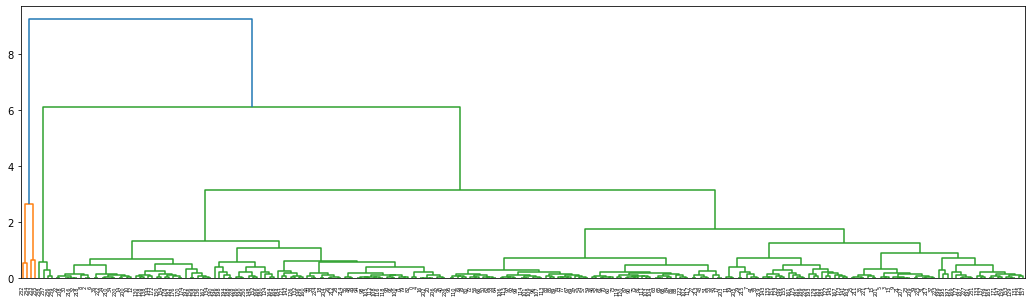

In [ ]:
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt

plt.figure(figsize=(18,5))
dendrogram = sch.dendrogram(sch.linkage(X, method='complete'))
plt.show()

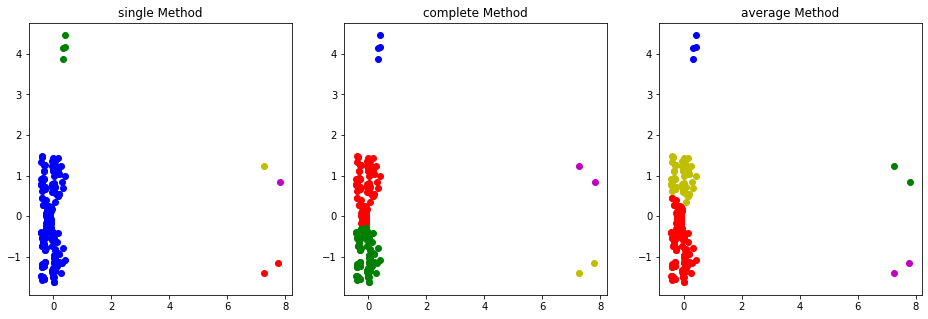

In [ ]:
linka_meth = ['single', 'complete', 'average']
counter = 1

plt.figure(figsize=(16,5))
color = ['ro','go','bo','mo','yo']

for meth in linka_meth:
  plt.subplot(1,3,counter)
  plt.title(f"{meth} Method")
  clt = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage=meth)
  clt.fit(X)

  ndf = pd.DataFrame(X)
  ndf.columns = ['atr1', 'atr2']
  ndf['cluster'] = clt.labels_
  
  for i in range(5):
    plt.plot(ndf[ndf.cluster==i].iloc[:,0], ndf[ndf.cluster==i].iloc[:,1], color[i])
  
  counter += 1

plt.show()

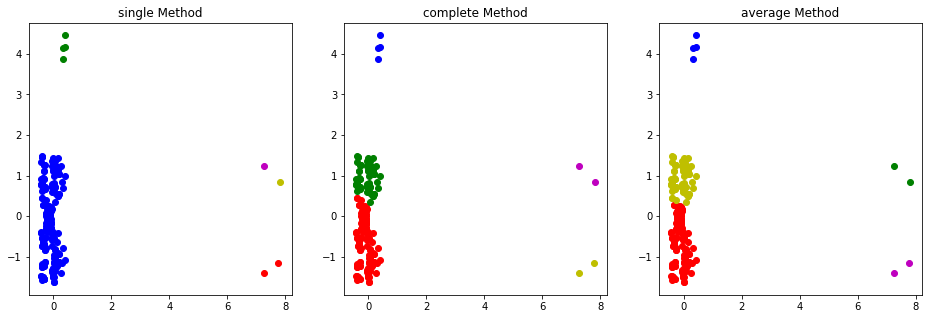

In [ ]:
linka_meth = ['single', 'complete', 'average']
counter = 1

plt.figure(figsize=(16,5))
color = ['ro','go','bo','mo','yo']

for meth in linka_meth:
  plt.subplot(1,3,counter)
  plt.title(f"{meth} Method")
  clt = AgglomerativeClustering(n_clusters=5, affinity='manhattan', linkage=meth)
  clt.fit(X)

  ndf = pd.DataFrame(X)
  ndf.columns = ['atr1', 'atr2']
  ndf['cluster'] = clt.labels_
  
  for i in range(5):
    plt.plot(ndf[ndf.cluster==i].iloc[:,0], ndf[ndf.cluster==i].iloc[:,1], color[i])
  
  counter += 1

plt.show()

In [ ]:
dendrogram.keys()

dict_keys(['icoord', 'dcoord', 'ivl', 'leaves', 'color_list', 'leaves_color_list'])

In [ ]:
for key in dendrogram.keys():
  print(key, len(dendrogram[key]))

icoord 239
dcoord 239
ivl 240
leaves 240
color_list 239
leaves_color_list 240


In [ ]:
dendrogram['icoord'][:5]

[[5.0, 5.0, 15.0, 15.0],
 [25.0, 25.0, 35.0, 35.0],
 [10.0, 10.0, 30.0, 30.0],
 [65.0, 65.0, 75.0, 75.0],
 [55.0, 55.0, 70.0, 70.0]]

In [ ]:
sch.linkage([[1],[2]])

array([[0., 1., 1., 2.]])

{'icoord': [[5.0, 5.0, 15.0, 15.0]],
 'dcoord': [[0.0, 1.0, 1.0, 0.0]],
 'ivl': ['0', '1'],
 'leaves': [0, 1],
 'color_list': ['C0'],
 'leaves_color_list': ['C0', 'C0']}

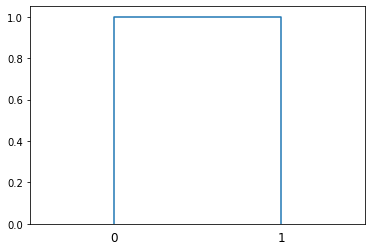

In [ ]:
sch.dendrogram(sch.linkage([[1,1],[2,1]], method='single'))

In [ ]:
sch.linkage([[1,1],[2,1]], method='single')

array([[0., 1., 1., 2.]])

In [ ]:
sch.linkage([[1,1],[2,1],[1,2],[2,2]], method='complete')

array([[0.        , 1.        , 1.        , 2.        ],
       [2.        , 3.        , 1.        , 2.        ],
       [4.        , 5.        , 1.41421356, 4.        ]])

In [ ]:
sch.linkage([[1,1],[2,1],[1,2],[2,2]], method='average')

array([[0.        , 1.        , 1.        , 2.        ],
       [2.        , 3.        , 1.        , 2.        ],
       [4.        , 5.        , 1.20710678, 4.        ]])